In [3]:
import pandas as pd
import numpy as np
import random
import os


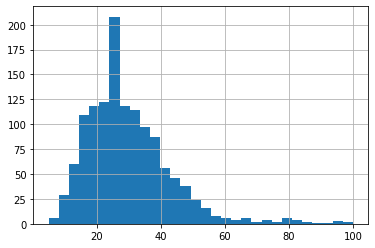

In [4]:
data = pd.read_csv("csvs/commands_v4_manually_updated_shuffled_1300.csv") 
ax = data["num_chars"].hist(bins = 30)

In [5]:
#data =  data.set_index('command_id')
data.loc[1].command_name # the explicit index is command_id that starts with 1!

'play the playlist Favourite songs'

In [6]:
data.index

RangeIndex(start=0, stop=1299, step=1)

In [59]:
num_copies = 2
ids = []
for i in range(num_copies):
    ids_curr =  list(data.index) # based on command_id
    random.shuffle(ids_curr)
    ids = ids + ids_curr
ids = np.array(ids)

In [60]:
frames_per_char = 5
max_num_frames = 900
num_pos = 9
num_trials = 2
path = os.getcwd()+"/csvs/v4/fpc{}".format(frames_per_char)
if (not os.path.isdir(path)):
    try:
        os.makedirs(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

In [61]:
data.loc[ids[0]].num_chars*frames_per_char

140

In [62]:
df = pd.DataFrame(columns = ["command_name","command_id","set_id","pos_id","expr_id",'subject_id','trial_id',"start_fr_id", "end_fr_id","num_chars"])
df['command_id'] = ids

i = 0
set_id = 1
while i<len(ids):
    t = i
    cum_command_num_fr = 1
    for j in range(i, len(ids)):
        curr_command_num_fr = data.loc[ids[j]].num_chars*frames_per_char
        if(cum_command_num_fr + curr_command_num_fr > max_num_frames):
            diff = np.ceil((max_num_frames - cum_command_num_fr)/(j-t))
            temp_end = df[df.set_id==set_id].loc[:,'end_fr_id']
            temp_start = df[df.set_id==set_id].loc[:,'start_fr_id']
            diff_end = np.arange(1,len(temp_end)+1)*diff
            diff_start = np.arange(0,len(temp_end))*diff
            df.update(temp_end+diff_end)
            df.update(temp_start+diff_start)

            set_id += 1
            break
        else:
            df.loc[i, 'start_fr_id'] = cum_command_num_fr  
            cum_command_num_fr += curr_command_num_fr
            df.loc[i, 'end_fr_id'] = cum_command_num_fr - 1 
            df.loc[i, 'set_id']= set_id
            df.loc[i, 'pos_id'] = (set_id-1)%num_pos+1
            df.loc[i, 'expr_id'] = int((set_id-1)/num_pos)+1
            df.loc[i, 'command_name'] = data.loc[ids[j]].command_name
            df.loc[i, 'subject_id'] = int((set_id-1)/num_pos/num_trials) + 1
            df.loc[i, 'trial_id'] = int((set_id-1)/num_pos)%num_trials + 1
            df.loc[i,'num_chars'] = data.loc[ids[j]].num_chars
            i+=1

In [63]:
print(df.subject_id.head(40))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
Name: subject_id, dtype: int64


In [64]:
 # only if needed
new_start_id = 2*27
df.update(df.subject_id+new_start_id)

In [65]:
df.subject_id.head(40)

0     55
1     55
2     55
3     55
4     55
5     55
6     55
7     55
8     55
9     55
10    55
11    55
12    55
13    55
14    55
15    55
16    55
17    55
18    55
19    55
20    55
21    55
22    55
23    55
24    55
25    55
26    55
27    55
28    55
29    55
30    55
31    55
32    55
33    55
34    55
35    55
36    55
37    55
38    55
39    55
Name: subject_id, dtype: int64

In [66]:
for s_id in df.subject_id.unique():
    df_sub = df[df.subject_id==s_id]
    df_sub = df_sub.drop(columns=['set_id', 'expr_id'])
    df_sub_1 = df_sub[df.trial_id==1].copy()
    df_sub_1 = df_sub_1.drop(columns=['subject_id', 'trial_id'])
    df_sub_2 = df_sub[df.trial_id==2].copy()
    df_sub_2 = df_sub_2.drop(columns=['subject_id', 'trial_id'])
    df_sub_1.to_csv(path+'/commands_sub{}_trial{}.csv'.format(s_id,1,frames_per_char))
    df_sub_2.to_csv(path+'/commands_sub{}_trial{}.csv'.format(s_id,2,frames_per_char))

/home/test/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/test/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
